# Import Statemets + Data

## Import Statemets

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sounddevice as sd

C:\Users\Ashwin\Miniconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Reading Data (.dat file)
sound1 = pd.read_csv('dataset/sound1.dat', sep=",", header=None).to_numpy().flatten().flatten()
sound2 = pd.read_csv('dataset/sound2.dat', sep=",", header=None).to_numpy().flatten().flatten()
sounds = np.concatenate([[sound1, sound2]], axis=-1)
print(sound1.shape)
print(sound2.shape)
print(sounds.shape)

(18000,)
(18000,)
(2, 18000)


In [3]:
sounds.shape

(2, 18000)

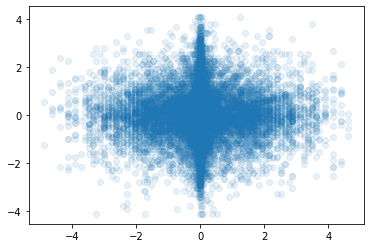

In [3]:
plt.scatter(sounds[0,:],sounds[1,:], alpha=0.1)

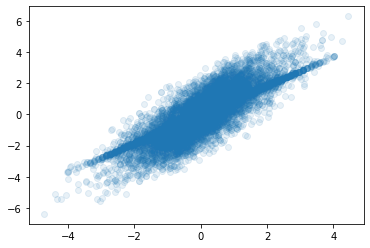

In [9]:
plt.scatter(sounds_mixed[0,:],sounds_mixed[1,:], alpha=0.1)

## Visualization

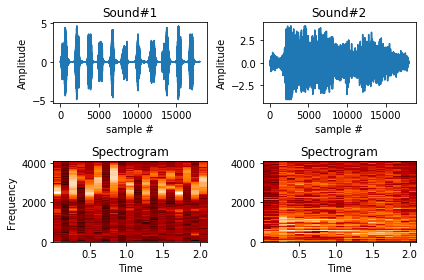

In [3]:
fig, axs = plt.subplots(2, 2)

axs[0, 0].plot(sound1)
axs[0, 0].set_title('Sound#1')
axs[0, 0].set_xlabel('sample #')
axs[0, 0].set_ylabel('Amplitude')

axs[0, 1].plot(sound2)
axs[0, 1].set_title('Sound#2')
axs[0, 1].set_xlabel('sample #')
axs[0, 1].set_ylabel('Amplitude')

NFFT = 1024  # the length of the windowing segments
Fs = 8192    # the sampling rate
spectrum,freqs,t ,img = axs[1, 0].specgram(sound1.flatten() ,  NFFT=NFFT, Fs = Fs ,  cmap=plt.cm.gist_heat)
axs[1, 0].set_title('Spectrogram')
axs[1, 0].set_xlabel('Time')
axs[1, 0].set_ylabel('Frequency')

spectrum2,freqs2,t2 ,img2=axs[1, 1].specgram(sound2.flatten() ,  NFFT=NFFT, Fs = Fs ,  cmap=plt.cm.gist_heat)
axs[1, 1].set_title('Spectrogram')
axs[1, 1].set_xlabel('Time')
axs[1, 0].set_ylabel('Frequency')
plt.tight_layout()

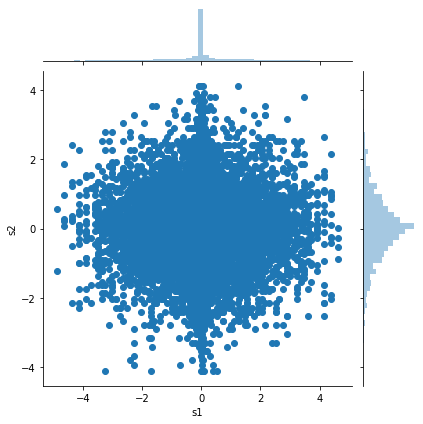

In [10]:
df = pd.DataFrame({'s1': sound1.flatten(), 's2': sound2.flatten()})
sns.jointplot(x="s1", y="s2", data=df)

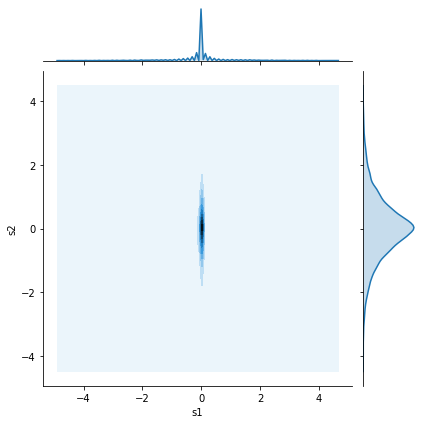

In [11]:
sns.jointplot(x="s1", y="s2", data=df,  kind="kde")

## Playing Sounds

In [12]:
samplfreq = 8192
factor = 1       #incr./decr frequency (speed up / slow down by a factor) (normal speed = 1)
#data
arr = sound1
#normalise the data to between -1 and 1. If your data wasn't/isn't normalised it will be very noisy when played here
sd.play( arr / np.max(np.abs(arr)), samplfreq*factor)

In [13]:
samplfreq = 8192
factor = 1       #incr./decr frequency (speed up / slow down by a factor) (normal speed = 1)
#data
arr = sound2
#normalise the data to between -1 and 1. If your data wasn't/isn't normalised it will be very noisy when played here
sd.play( arr / np.max(np.abs(arr)), samplfreq*factor)

## Mixing(simulated) the Sources

In [5]:
A = np.random.random((2,2))             #Mixing Matrix
while np.linalg.matrix_rank(A) != 2:    #Check it its invertible
    A = np.random.random((2,2))
sounds_mixed = A@sounds

In [6]:
sounds_mixed = A@sounds

In [7]:
sound1_mixed = sounds_mixed[0,:]
sound2_mixed = sounds_mixed[1,:]

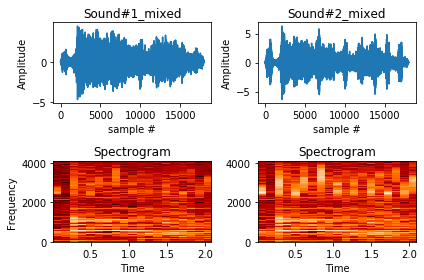

In [8]:
fig, axs = plt.subplots(2, 2)

axs[0, 0].plot(sound1_mixed)
axs[0, 0].set_title('Sound#1_mixed')
axs[0, 0].set_xlabel('sample #')
axs[0, 0].set_ylabel('Amplitude')

axs[0, 1].plot(sound2_mixed)
axs[0, 1].set_title('Sound#2_mixed')
axs[0, 1].set_xlabel('sample #')
axs[0, 1].set_ylabel('Amplitude')

NFFT = 1024  # the length of the windowing segments
Fs = 8192    # the sampling rate
spectrum,freqs,t ,img = axs[1, 0].specgram(sound1_mixed.flatten() ,  NFFT=NFFT, Fs = Fs ,  cmap=plt.cm.gist_heat)
axs[1, 0].set_title('Spectrogram')
axs[1, 0].set_xlabel('Time')
axs[1, 0].set_ylabel('Frequency')

spectrum2,freqs2,t2 ,img2=axs[1, 1].specgram(sound2_mixed.flatten() ,  NFFT=NFFT, Fs = Fs ,  cmap=plt.cm.gist_heat)
axs[1, 1].set_title('Spectrogram')
axs[1, 1].set_xlabel('Time')
axs[1, 0].set_ylabel('Frequency')
plt.tight_layout()

In [14]:
samplfreq = 8192
factor = 1       #incr./decr frequency (speed up / slow down by a factor) (normal speed = 1)
#data
arr = sound1_mixed
#normalise the data to between -1 and 1. If your data wasn't/isn't normalised it will be very noisy when played here
sd.play( arr / np.max(np.abs(arr)), samplfreq*factor)

In [15]:
samplfreq = 8192
factor = 1       #incr./decr frequency (speed up / slow down by a factor) (normal speed = 1)
#data
arr = sound2_mixed
#normalise the data to between -1 and 1. If your data wasn't/isn't normalised it will be very noisy when played here
sd.play( arr / np.max(np.abs(arr)), samplfreq*factor)

<b> Destroying Temporal Structure::: </b>

In [201]:
sounds_mixed_permuted = sounds_mixed[:, np.random.permutation(sounds_mixed.shape[1])]

In [202]:
sound1_mixed_permuted = sounds_mixed_permuted[0,:]
sound2_mixed_permuted = sounds_mixed_permuted[1,:]

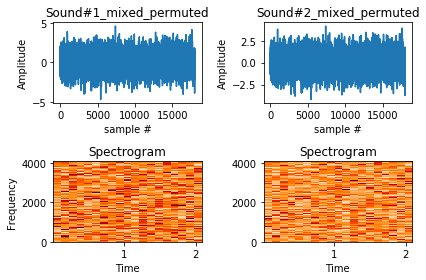

In [203]:
fig, axs = plt.subplots(2, 2)

axs[0, 0].plot(sound1_mixed_permuted)
axs[0, 0].set_title('Sound#1_mixed_permuted')
axs[0, 0].set_xlabel('sample #')
axs[0, 0].set_ylabel('Amplitude')

axs[0, 1].plot(sound2_mixed_permuted)
axs[0, 1].set_title('Sound#2_mixed_permuted')
axs[0, 1].set_xlabel('sample #')
axs[0, 1].set_ylabel('Amplitude')

NFFT = 1024  # the length of the windowing segments
Fs = 8192    # the sampling rate
spectrum,freqs,t ,img = axs[1, 0].specgram(sound1_mixed_permuted.flatten() ,  NFFT=NFFT, Fs = Fs ,  cmap=plt.cm.gist_heat)
axs[1, 0].set_title('Spectrogram')
axs[1, 0].set_xlabel('Time')
axs[1, 0].set_ylabel('Frequency')

spectrum2,freqs2,t2 ,img2=axs[1, 1].specgram(sound2_mixed_permuted.flatten() ,  NFFT=NFFT, Fs = Fs ,  cmap=plt.cm.gist_heat)
axs[1, 1].set_title('Spectrogram')
axs[1, 1].set_xlabel('Time')
axs[1, 0].set_ylabel('Frequency')
plt.tight_layout()

In [204]:
samplfreq = 8192
factor = 1       #incr./decr frequency (speed up / slow down by a factor) (normal speed = 1)
#data
arr = sound1_mixed_permuted
#normalise the data to between -1 and 1. If your data wasn't/isn't normalised it will be very noisy when played here
sd.play( arr / np.max(np.abs(arr)), samplfreq*factor)

In [205]:
corr  = np.zeros((2,2))
for i in range(2):
    for j in range(2):
        corr_bw_mixedperm_sources = np.cov(sounds[i,:], sounds_mixed_permuted[j,:])  / ( np.std(sounds[i,:]) * np.std(sounds_mixed_permuted[j,:]) )
        corr[i,j] = corr_bw_mixedperm_sources[0,1]
        print("Correlation Between Source :{} and Mixture :{} is \n {} \n".format(i,j,corr_bw_mixedperm_sources))

Correlation Between Source :0 and Mixture :0 is 
 [[ 1.1084408  -0.00629621]
 [-0.00629621  0.90226841]] 

Correlation Between Source :0 and Mixture :1 is 
 [[ 1.22983508 -0.00616654]
 [-0.00616654  0.81320751]] 

Correlation Between Source :1 and Mixture :0 is 
 [[1.10878315 0.0135147 ]
 [0.0135147  0.90198982]] 

Correlation Between Source :1 and Mixture :1 is 
 [[1.23021493 0.01553773]
 [0.01553773 0.81295642]] 



In [206]:
corr

array([[-0.00629621, -0.00616654],
       [ 0.0135147 ,  0.01553773]])

The absence of any correlation between the sources and the mixtures is 
 a result of removing all temporal structure from the mixtures


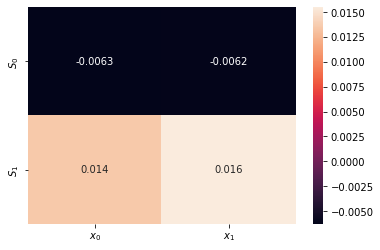

In [207]:
sns.heatmap(corr, annot=True, xticklabels=['$x_0$','$x_1$'] ,  yticklabels=['$S_0$','$S_1$'])
print("The absence of any correlation between the sources and the mixtures is \n a result of removing all temporal structure from the mixtures")

In [10]:
sounds_mixed_zero_mean = sounds_mixed - sounds_mixed.mean(axis=-1).reshape(2,1)
sound1_mixed_zero_mean = sounds_mixed_zero_mean[0,:]
sound2_mixed_zero_mean = sounds_mixed_zero_mean[1,:]

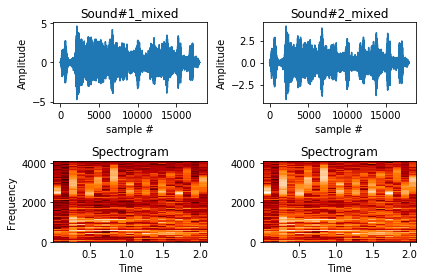

In [209]:
fig, axs = plt.subplots(2, 2)

axs[0, 0].plot(sound1_mixed_zero_mean)
axs[0, 0].set_title('Sound#1_mixed')
axs[0, 0].set_xlabel('sample #')
axs[0, 0].set_ylabel('Amplitude')

axs[0, 1].plot(sound2_mixed_zero_mean)
axs[0, 1].set_title('Sound#2_mixed')
axs[0, 1].set_xlabel('sample #')
axs[0, 1].set_ylabel('Amplitude')

NFFT = 1024  # the length of the windowing segments
Fs = 8192    # the sampling rate
spectrum,freqs,t ,img = axs[1, 0].specgram(sound1_mixed_zero_mean.flatten() ,  NFFT=NFFT, Fs = Fs ,  cmap=plt.cm.gist_heat)
axs[1, 0].set_title('Spectrogram')
axs[1, 0].set_xlabel('Time')
axs[1, 0].set_ylabel('Frequency')

spectrum2,freqs2,t2 ,img2=axs[1, 1].specgram(sound2_mixed_zero_mean.flatten() ,  NFFT=NFFT, Fs = Fs ,  cmap=plt.cm.gist_heat)
axs[1, 1].set_title('Spectrogram')
axs[1, 1].set_xlabel('Time')
axs[1, 0].set_ylabel('Frequency')
plt.tight_layout()

In [210]:
samplfreq = 8192
factor = 1       #incr./decr frequency (speed up / slow down by a factor) (normal speed = 1)
#data
arr = sound1_mixed_zero_mean
#normalise the data to between -1 and 1. If your data wasn't/isn't normalised it will be very noisy when played here
sd.play( arr / np.max(np.abs(arr)), samplfreq*factor)

# InfoMax Method

In [15]:
A = np.array([[2,1],[0,4]])

In [181]:
A = np.random.random((2,2))             #Mixing Matrix
while np.linalg.matrix_rank(A) != 2:    #Check it its invertible
    A = np.random.random((2,2))
sounds_mixed = A@sounds
X = sounds_mixed - sounds_mixed.mean(axis=-1).reshape(2,1)

In [14]:
sounds_mixed = A@sounds
X = sounds_mixed - sounds_mixed.mean(axis=-1).reshape(2,1)

NameError: name 'A' is not defined

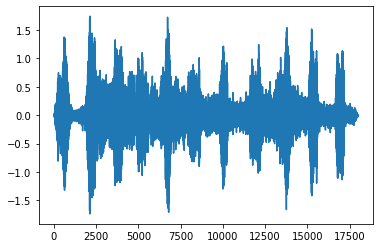

In [19]:
plt.plot(X[0,:])

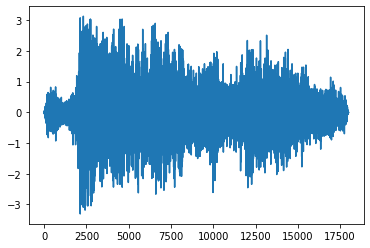

In [18]:
plt.plot(X[1,:])

In [180]:
X = sounds_mixed

In [856]:
X = sounds_mixed_permuted

In [3]:
X = sounds_mixed

NameError: name 'sounds_mixed' is not defined

In [179]:
def sigmoid(y):
    return 1./(1+np.exp(-y))

def phi(x, W):
    x = x.reshape(2,1)
    phi =  1-2*sigmoid(W@x)
    #phi = phi.reshape(x.shape[0],1)
    return phi

def update_standard_gradient(W, x, eta):
    W_inv = np.linalg.inv(W)   
    x = x.reshape(1,2)
    de = W_inv.T + phi(x, W)@ x
    dW = de
    #W = W + dW
    #F_norm  = np.sum(dW**2)
    return dW

In [182]:
#Initialize W
np.random.seed(5)
W = np.random.random((2,2))             #Mixing Matrix
while np.linalg.matrix_rank(W) != 2:    #Check it its invertible
    W = np.random.random((2,2))
print(W)

[[0.22199317 0.87073231]
 [0.20671916 0.91861091]]


In [ ]:
eta_0 = 0.1
for epoch in range(1):
    for t in range(X.shape[1]):
            #eta = eta_0 * (0.9999**t)
            x = X[:,t]
            dW =  update_standard_gradient(W, x, eta)
            dW = dW.reshape(1,2,2)
            L = np.concatenate((dW, L), axis=-3)
            dww = L.mean(-3)
    W = W + dww*eta_0
print(W)

In [ ]:
#Initialize W
np.random.seed(5)
W = np.random.random((2,2))             #Mixing Matrix
while np.linalg.matrix_rank(W) != 2:    #Check it its invertible
    W = np.random.random((2,2))
print(W)
L = np.zeros((1,2,2))

eta_0 = 0.1
for epoch in range(1):
    for t in range(X.shape[1]):
            #eta = eta_0 * (0.9999**t)
            x = X[:,t]
            dW =  update_standard_gradient(W, x, eta)
            dW = dW.reshape(1,2,2)
            L = np.concatenate((dW, L), axis=-3)
            dww = L.mean(-3)
    W = W + dww*eta_0
print(W)

[[0.22199317 0.87073231]
 [0.20671916 0.91861091]]


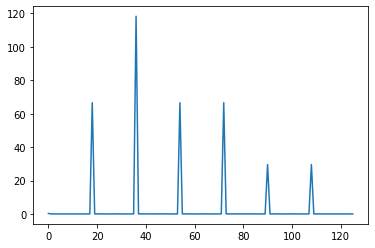

In [82]:
plt.plot(err)

In [177]:
def sigmoid(y):
    return 1./(1+np.exp(-y))
def phi(x, W):
    phi =  1-2*sigmoid(x@W)
    phi = phi.reshape(x.shape[0],1)
    return phi
def update_natural_gradient(W, x, eta):
    de = np.eye(x.shape[0]) + phi(x, W) @ (W@x).reshape(1,x.shape[0])
    dW = de @ W
    dW = dW * eta
    dW[0,0] = 0
    dW[1,1] = 0
    W = W + dW
    F_norm  = np.sum(dW**2)
    return W, F_norm

In [28]:
#Initialize W
np.random.seed(5)
W = np.random.random((2,2))             #Mixing Matrix
while np.linalg.matrix_rank(A) != 2:    #Check if its invertible
    W = np.random.random((2,2))
print(W)

eta_0 = 0.1
err= []

for i i
for t in range(X.shape[1]):
        eta = eta_0/(t+1)
        x = X[:,t]
        W, F_norm = update_natural_gradient(W, x, eta)
        if t%1000 == 0:
            err.append(F_norm) 
print(W)

[[0.22199317 0.87073231]
 [0.20671916 0.91861091]]


NameError: name 'update_natural_gradient' is not defined

In [150]:
def f(y):
    return 1 / (1 + np.exp(-y))

def phi(y):
    return 1 - 2 * f(y)

def update_regular(W, x, eta):
    W_inv = np.linalg.inv(W)    
    delta_W = W_inv.T + phi(W.dot(x)).reshape(2,1).dot(x.reshape(1,2))
    return W + eta * delta_W,  delta_W, eta * delta_W

#W = np.linalg.inv(np.random.RandomState(13+1).rand(2,2))
#Initialize W
np.random.seed(5)
W = np.random.random((2,2))             #Mixing Matrix
while np.linalg.matrix_rank(A) != 2:    #Check it its invertible
    W = np.random.random((2,2))
    
#A = np.linalg.inv(np.random.RandomState(13).rand(2,2))
A = np.random.random((2,2))             #Mixing Matrix
while np.linalg.matrix_rank(A) != 2:    #Check it its invertible
    A = np.random.random((2,2))
    
X = A.dot(sounds)
X = X - X.mean(axis=1).reshape(2,1)
k=[]
for i in range(100):
    eta_0 = 20
    eta = eta_0 / (t + 1)
    delta_W_norms = []
    delta_W_norms_eta = []
    for t in range(X.shape[1]):
        #eta = eta_0 / (t + 1)
        x = X[:,t]
        W, delta_W, delta_W_eta = update_regular(W, x, eta)
        if t % 1000 == 0:
            delta_W_norms.append(np.sum(delta_W ** 2)) # for 6.3 (c)
            delta_W_norms_eta.append(np.sum(delta_W_eta ** 2)) # for 6.3 (c)
    k.append(np.sum(delta_W ** 2))
rec = W.dot(A.dot(sounds))

In [150]:
def ica_natgrad_componentwise(x_alpha , N, W) :
    dW = np.zeros_like(W)
    for i in range(N) :
            for j in range(N) :
                wk = np.dot(W[i,:] , x_alpha)
                for ll in range(N):
                    dil = int(i == ll)
                    fpp_fp = 1.-2.* sigmoid(wk ) # f " ( y ) / f ’ ( y )
                    dW[i,j] += (dil + fpp_fp * np.dot(W[ll,:],x_alpha)) * W[ll,j]
    return dW

In [186]:
x = np.array([2,3])
x

array([2, 3])

In [201]:
W

array([[0.2920738 , 1.06275557],
       [0.24930361, 1.19682488]])

In [227]:
ica_natgrad_componentwise(x , 2, W) 

array([[0.22199317, 0.95625538],
       [0.22185744, 0.91861091]])

In [230]:
update_natural_gradient(W, x, 1)

(array([[0.22199317, 1.91251077],
        [0.44371487, 0.91861091]]),
 0.9636450825438605)

In [160]:
    de = np.eye(x.shape[0]) + phi(x, W) @ (W@x).reshape(1,x.shape[0])
    dW = de @ W
    dW = dW * eta


In [161]:
dW

array([[1.23248613e-06, 1.12511218e-05],
       [2.15876468e-06, 5.08804661e-06]])

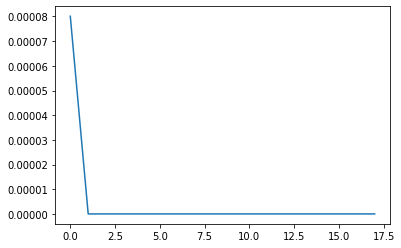

In [217]:
plt.plot(err)

In [70]:
plt.plot(delta_W_norms_eta)

NameError: name 'delta_W_norms_eta' is not defined

In [83]:
#sounds_mixed = A@sounds
X_reconstructed = W@X
sound1_reconstructed = X_reconstructed[0,:]
sound2_reconstructed = X_reconstructed[1,:]

In [86]:
samplfreq = 8192
factor = 1       #incr./decr frequency (speed up / slow down by a factor) (normal speed = 1)
#data
arr = sound1_reconstructed
#normalise the data to between -1 and 1. If your data wasn't/isn't normalised it will be very noisy when played here
sd.play( arr / np.max(np.abs(arr)), samplfreq*factor)

In [85]:
samplfreq = 8192
factor = 1       #incr./decr frequency (speed up / slow down by a factor) (normal speed = 1)
#data
arr = sound2_reconstructed
#normalise the data to between -1 and 1. If your data wasn't/isn't normalised it will be very noisy when played here
sd.play( arr / np.max(np.abs(arr)), samplfreq*factor)

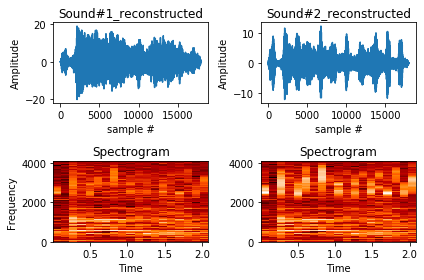

In [84]:
fig, axs = plt.subplots(2, 2)

axs[0, 0].plot(sound1_reconstructed)
axs[0, 0].set_title('Sound#1_reconstructed')
axs[0, 0].set_xlabel('sample #')
axs[0, 0].set_ylabel('Amplitude')

axs[0, 1].plot(sound2_reconstructed)
axs[0, 1].set_title('Sound#2_reconstructed')
axs[0, 1].set_xlabel('sample #')
axs[0, 1].set_ylabel('Amplitude')

NFFT = 1024  # the length of the windowing segments
Fs = 8192    # the sampling rate
spectrum,freqs,t ,img = axs[1, 0].specgram(sound1_reconstructed.flatten() ,  NFFT=NFFT, Fs = Fs ,  cmap=plt.cm.gist_heat)
axs[1, 0].set_title('Spectrogram')
axs[1, 0].set_xlabel('Time')
axs[1, 0].set_ylabel('Frequency')

spectrum2,freqs2,t2 ,img2=axs[1, 1].specgram(sound2_reconstructed.flatten() ,  NFFT=NFFT, Fs = Fs ,  cmap=plt.cm.gist_heat)
axs[1, 1].set_title('Spectrogram')
axs[1, 1].set_xlabel('Time')
axs[1, 0].set_ylabel('Frequency')
plt.tight_layout()

# Sklearn FastICA

In [41]:
from sklearn.decomposition import FastICA

In [62]:
sound1 = pd.read_csv('dataset/sound1.dat', sep=",", header=None).to_numpy().flatten().flatten()
sound2 = pd.read_csv('dataset/sound2.dat', sep=",", header=None).to_numpy().flatten().flatten()
sounds = np.concatenate([[sound1, sound2]], axis=-1)

In [63]:
A = np.random.random((2,2)) *5            #Mixing Matrix
while np.linalg.matrix_rank(A) != 2:    #Check it its invertible
    A = np.random.random((2,2))
sounds_mixed = A@sounds

In [64]:
sounds_mixed/=sounds_mixed.std(-1).reshape(2,1)

In [65]:
ica = FastICA(n_components=2)

In [67]:
S_ = ica.fit_transform(sounds_mixed.T)

In [68]:
S = S_.T

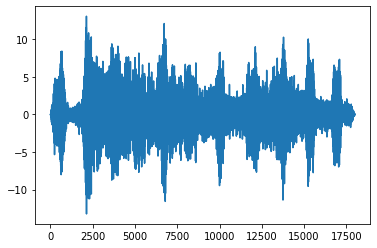

In [59]:
plt.plot(sounds_mixed[0,:])

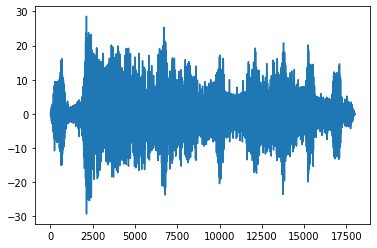

In [60]:
plt.plot(sounds_mixed[1,:])

In [61]:
samplfreq = 8192
factor = 1       #incr./decr frequency (speed up / slow down by a factor) (normal speed = 1)
#data
arr = sounds_mixed[0,:]
#normalise the data to between -1 and 1. If your data wasn't/isn't normalised it will be very noisy when played here
sd.play( arr / np.max(np.abs(arr)), samplfreq*factor)

In [52]:
samplfreq = 8192
factor = 1       #incr./decr frequency (speed up / slow down by a factor) (normal speed = 1)
#data
arr = S[0,:]
#normalise the data to between -1 and 1. If your data wasn't/isn't normalised it will be very noisy when played here
sd.play( arr / np.max(np.abs(arr)), samplfreq*factor)

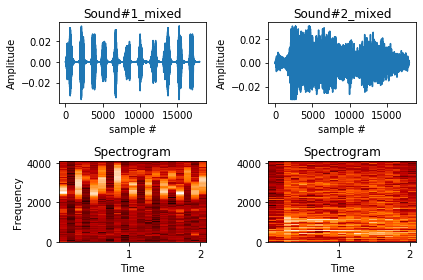

In [69]:
fig, axs = plt.subplots(2, 2)

axs[0, 0].plot(S[1,:])
axs[0, 0].set_title('Sound#1_mixed')
axs[0, 0].set_xlabel('sample #')
axs[0, 0].set_ylabel('Amplitude')

axs[0, 1].plot(S[0,:])
axs[0, 1].set_title('Sound#2_mixed')
axs[0, 1].set_xlabel('sample #')
axs[0, 1].set_ylabel('Amplitude')

NFFT = 1024  # the length of the windowing segments
Fs = 8192    # the sampling rate
spectrum,freqs,t ,img = axs[1, 0].specgram(S[1,:].flatten() ,  NFFT=NFFT, Fs = Fs ,  cmap=plt.cm.gist_heat)
axs[1, 0].set_title('Spectrogram')
axs[1, 0].set_xlabel('Time')
axs[1, 0].set_ylabel('Frequency')

spectrum2,freqs2,t2 ,img2=axs[1, 1].specgram(S[0,:].flatten() ,  NFFT=NFFT, Fs = Fs ,  cmap=plt.cm.gist_heat)
axs[1, 1].set_title('Spectrogram')
axs[1, 1].set_xlabel('Time')
axs[1, 0].set_ylabel('Frequency')
plt.tight_layout()